Solve the following set of problems using Python <br><br> 1. Load the "housing.csv" dataset and follow this link for the data description (features and target variable). Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least 4 performance metric). <br><br>2. Apply PCA on the dataset and select the first three principal components. Split the dataset into train and test using the same method used in Q1. Compare the performance of this model with the performance obtained in Q1. Explain the outcome.<br><br>
3. Load "IRIS " datasets from SKlearn and follow this link for the data description (features and target variable). Apply PCA on the dataset and select the first three principal components. Split the dataset in train and test set (use your choice of splitting). Train a logistic regression model and report the performance (use your choice of at least 4 performance metric).<br><br> 4. Apply L1 or L2 regulariser on the logistic regression model developed using the same train and test data used in Q3 and calculate performance of the new model. Compare performance of this model with the performance reported in Q3. Explain the outcome.<br><br> 5. Load "digits" datasets from SKlearn and print the dimension of the dataset. Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s.<br><br> 6. Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.<br><br> 7. Load "diabetes" datasets from SKlearn and print the dimension of the dataset. Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique.<br><br> 8. Create a model for detecting diabetes using SVM with a poly kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.<br><br> 9. Based on the model hyper-parameters used in Q6 and Q8, share your understanding of hyper-parameters tuning in ML model development.

# <u>Solution</u>

<b>1. Load the "housing.csv" dataset and follow this link for the data description (features and target variable). Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least 4 performance metric).</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Important Librarires

In [2]:
house_df = pd.read_csv("housing.csv") #Reading datafile
house_df.columns = house_df.columns.str.strip() #to eliminate unwanted space from column name
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
house_df.shape

(506, 14)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
house_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No null values found.

In [6]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


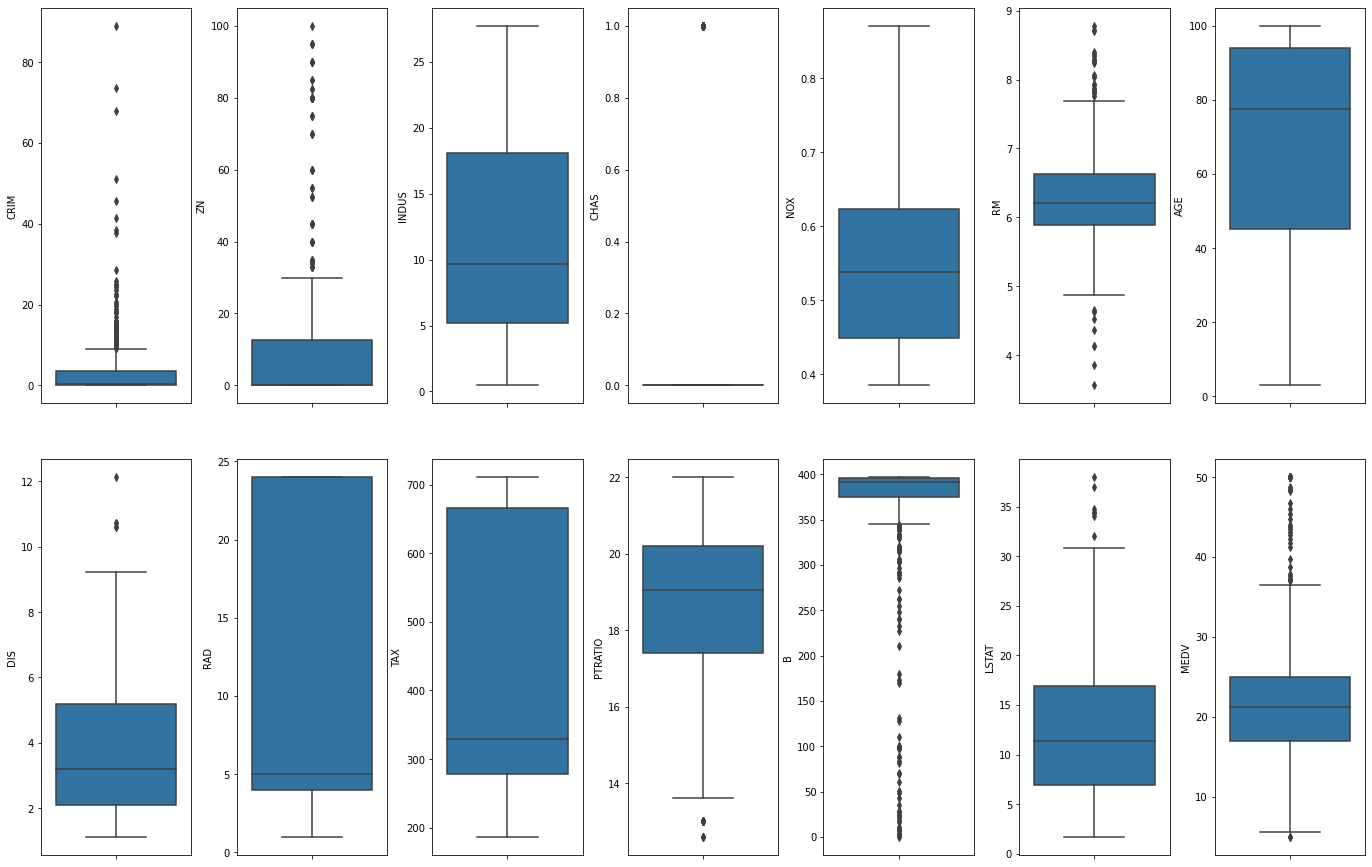

In [7]:
#Checking for outliers 
fig,axes = plt.subplots(2,7,figsize=(19, 12))
index =0
axes=axes.flatten()
for j in house_df:
    sns.boxplot(y=j,data=house_df,ax=axes[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)     

From the boxplot we found some outliers present, but now we are not dealing with it. <b> (Linear Regression on Boston Housing Dataset 2018:Exploratory Data Analysis) </b>

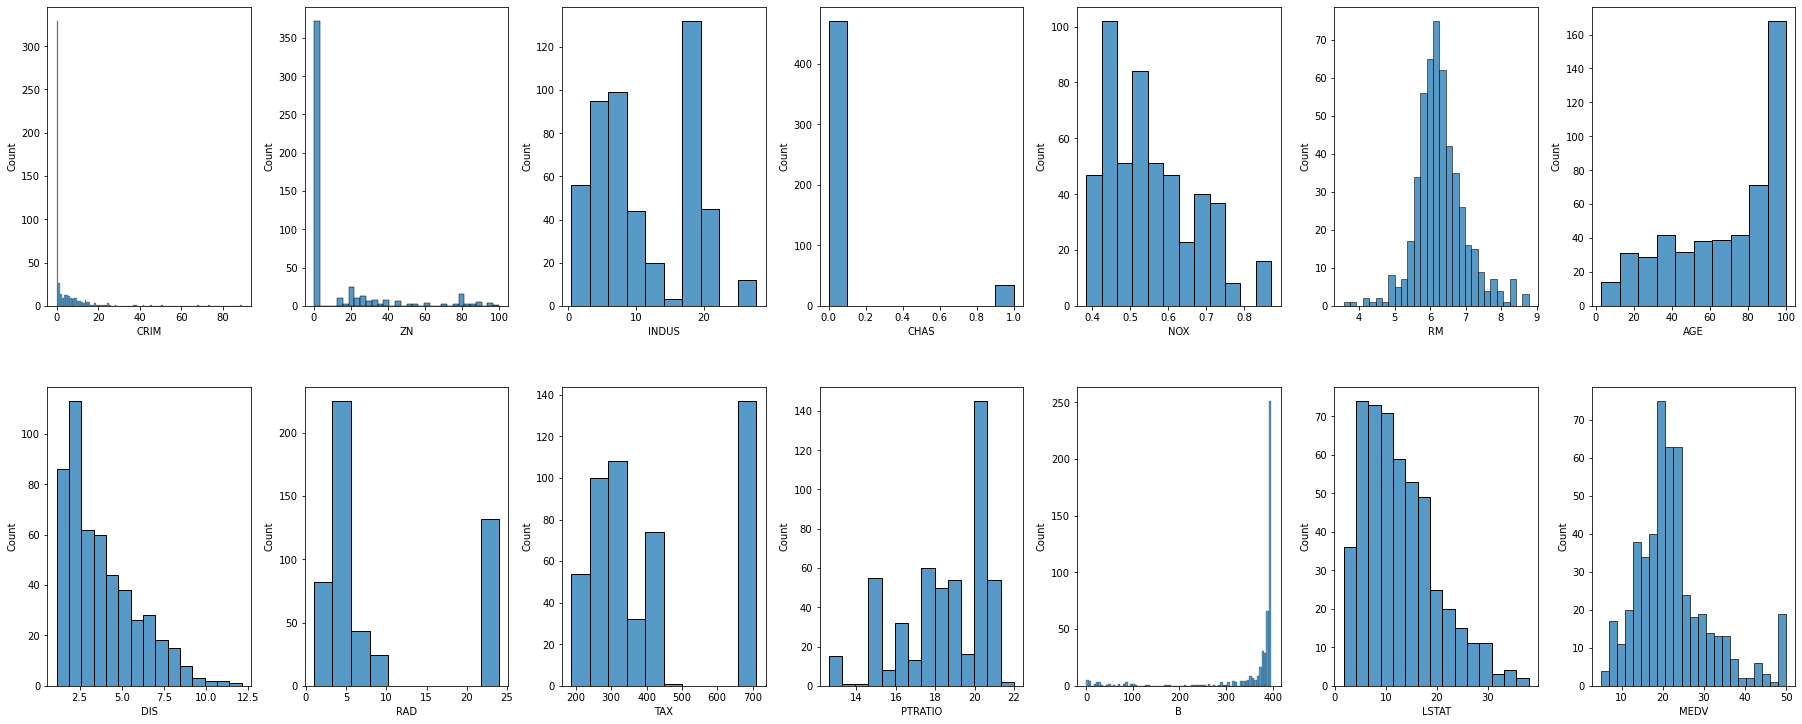

In [8]:
fig,axes2 = plt.subplots(2,7,figsize=(25, 10)) #Distribution of data
index =0
axes2=axes2.flatten()
for j in house_df:
    sns.histplot(house_df[j],ax=axes2[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0) 

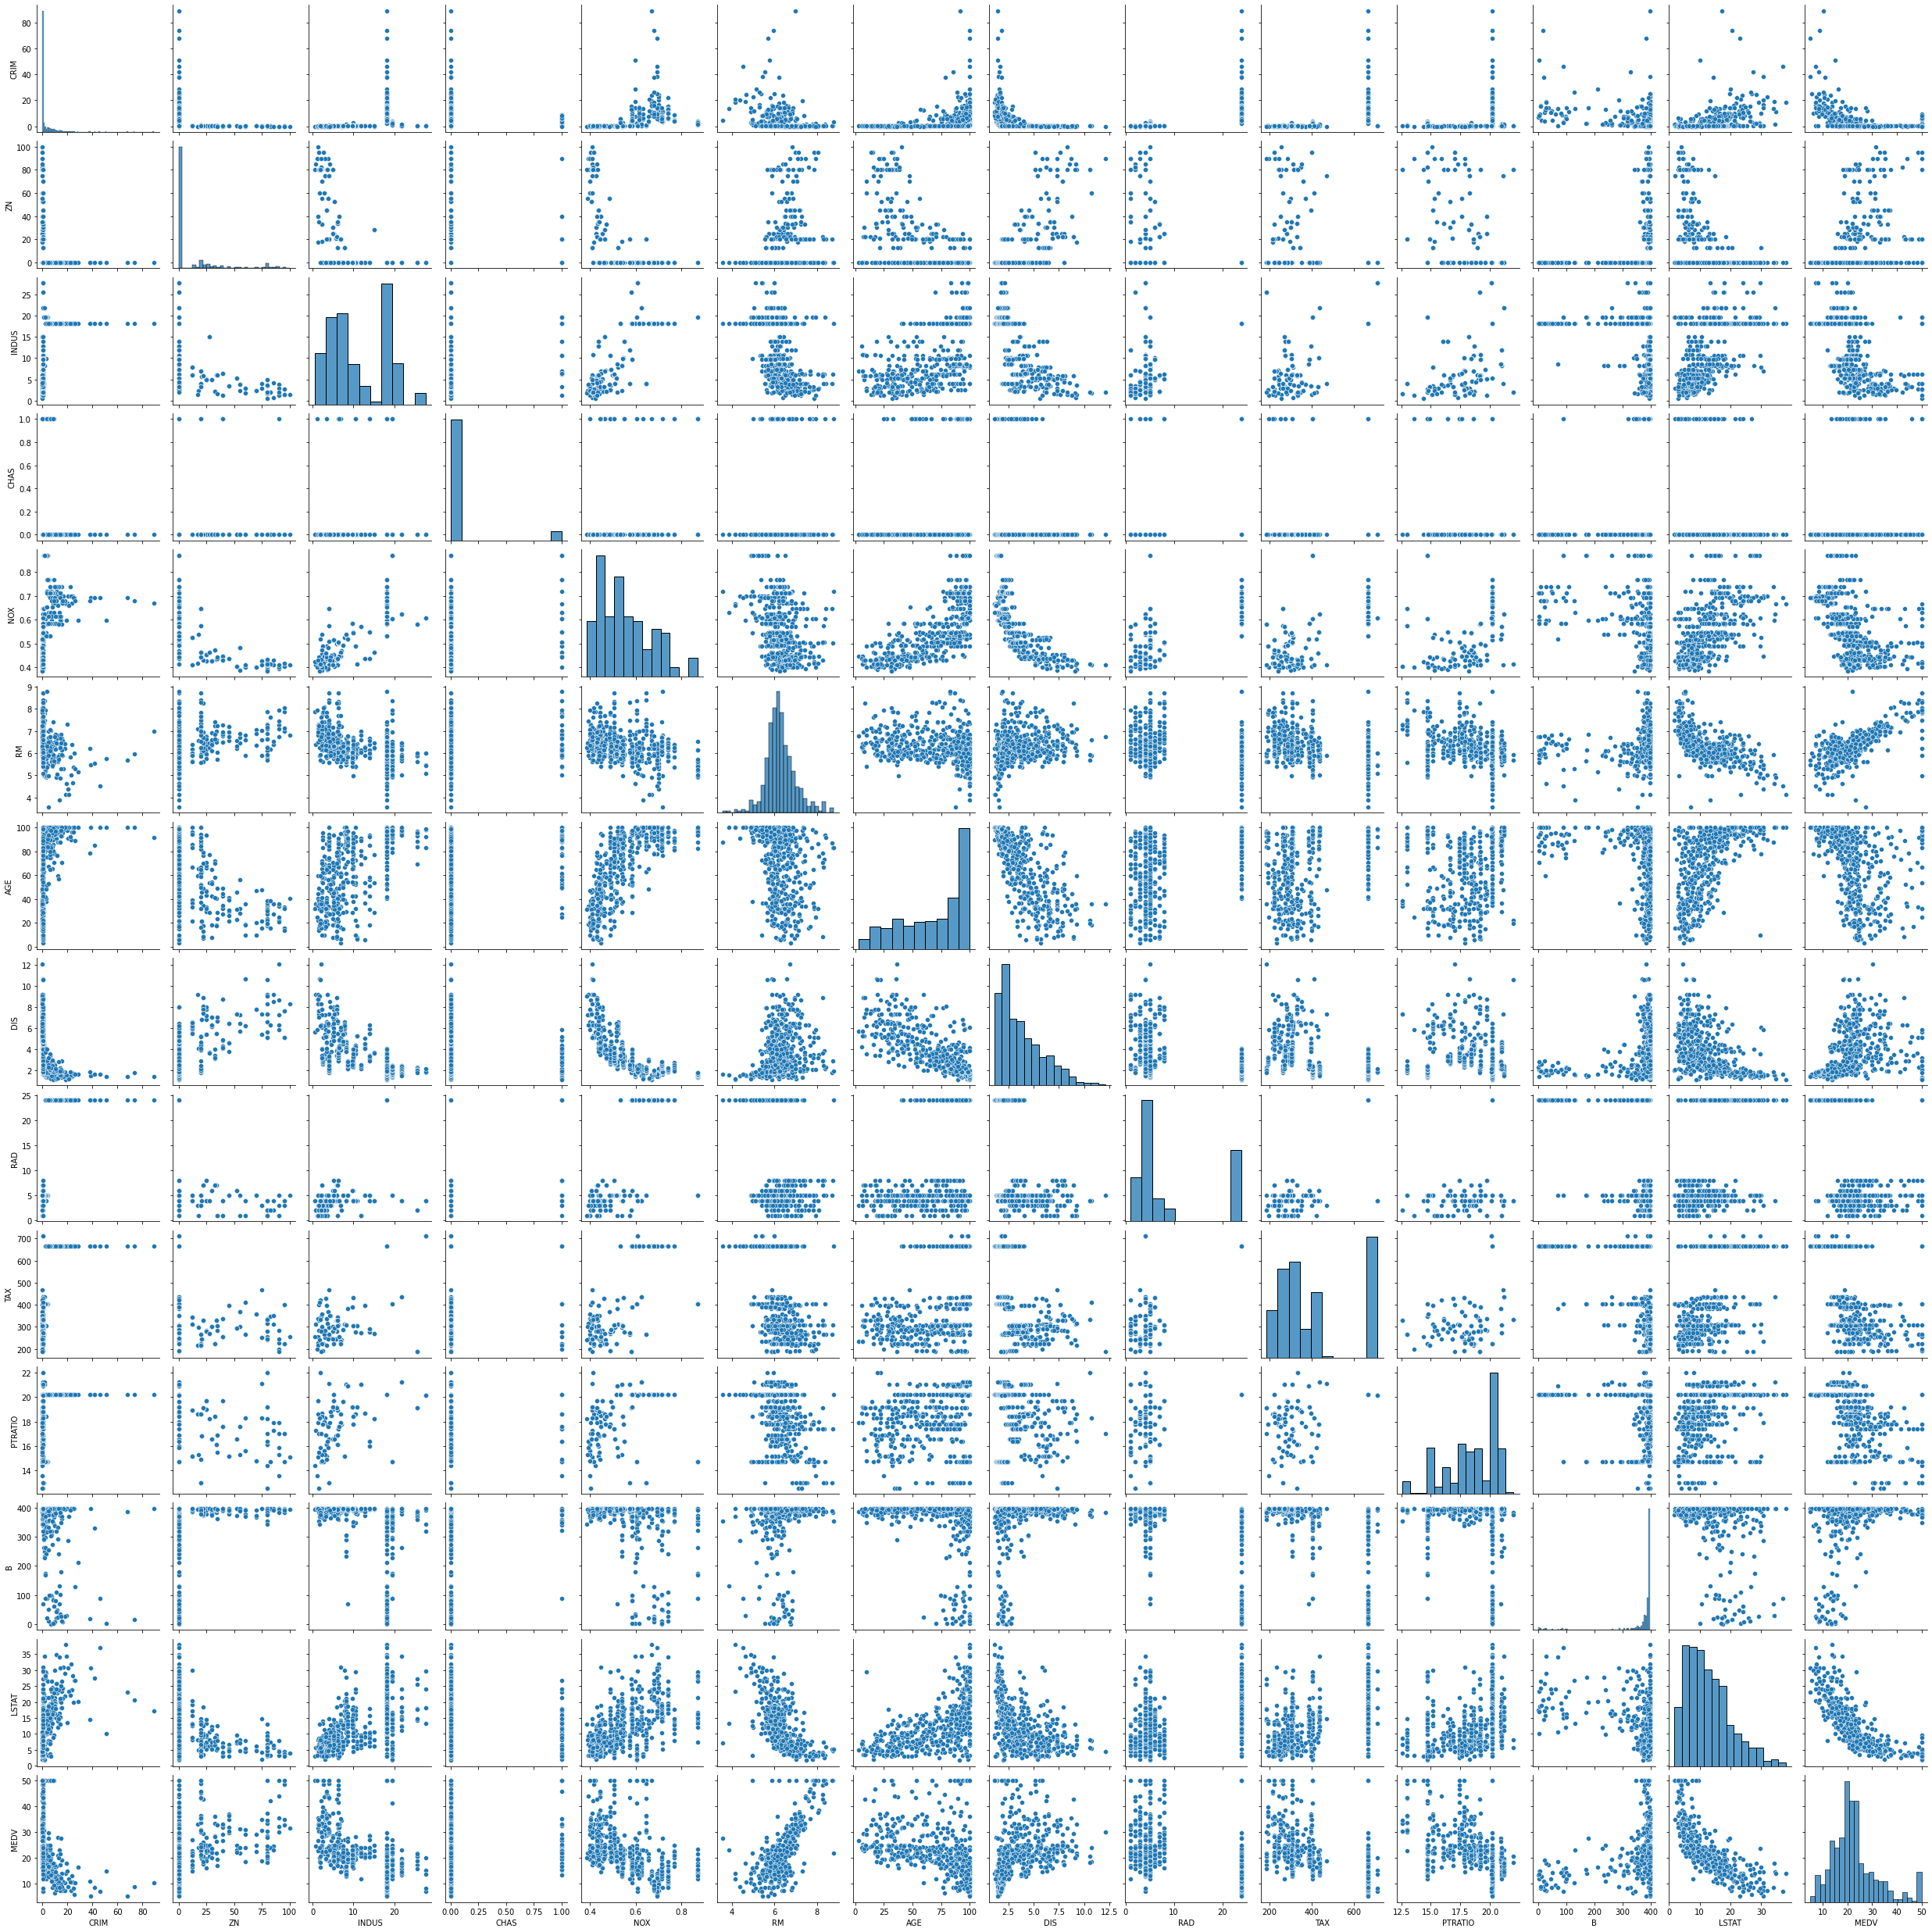

In [9]:
sns.pairplot(house_df) #relation between each attributes

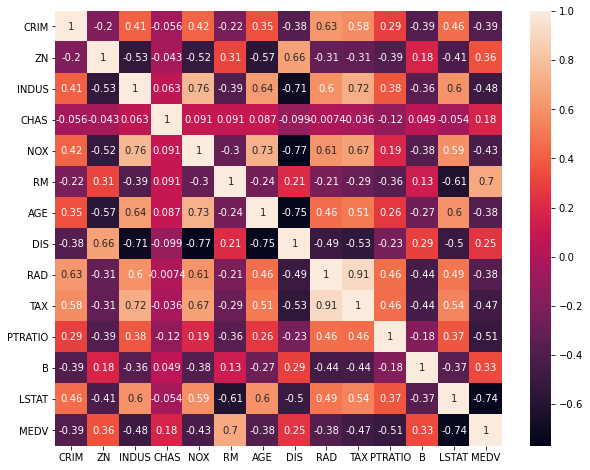

In [10]:
plt.figure(figsize=(10,8)) #Heatmap of correaltion
sns.heatmap(house_df.corr(),annot=True)
plt.show()

From the above graphs we can see there are some variables that have good relations, we can either combine it or leave as it is. We are not combining it now.

In [11]:
#Model Bulding

#Splitting data into train and test
X = house_df.drop(columns='MEDV')
y= house_df['MEDV']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  #Important Libraries for performance and model building

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=8)

In [13]:
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)
y_pred = lmodel.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [15]:
evl = {'Model':["LinearRegression"],"Mean Squared Error":[mse],"Mean Absolute Error":[mae],"Root Mean Squared Error":[rmse],"R-Squared Error":[r2]
       }
lmodel_pm = pd.DataFrame(evl)

In [16]:
lmodel_pm

,Model,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-Squared Error
0,LinearRegression,21.638234,3.368942,4.651692,0.707963


<b>2. Apply PCA on the dataset and select the first three principal components. Split the dataset into train and test using the same method used in Q1. Compare the performance of this model with the performance obtained in Q1. Explain the outcome.</b>

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_out = pca.fit_transform(X)
pca_out.shape

(506, 3)

In [18]:
#After PCA dimension reduced from 14 to 3

X_train, X_test, y_train, y_test = train_test_split(pca_out,y,test_size=0.2,random_state=8)

In [19]:
lmodel_pca = LinearRegression()
lmodel_pca.fit(X_train,y_train)
y_pred_pca = lmodel_pca.predict(X_test)

In [20]:
mae_pca = mean_absolute_error(y_test,y_pred_pca)
mse_pca = mean_squared_error(y_test,y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_test,y_pred_pca)

In [21]:
pca_li = {'Model':"LinearRegression after PCA3","Mean Squared Error":mse_pca,"Mean Absolute Error":mae_pca,"Root Mean Squared Error":rmse_pca,"R-Squared Error":r2_pca
       }
lmodel_pm = lmodel_pm.append(pca_li,ignore_index =True)
lmodel_pm

,Model,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-Squared Error
0,LinearRegression,21.638234,3.368942,4.651692,0.707963
1,LinearRegression after PCA3,56.793829,5.557216,7.536168,0.233491


In [22]:
sum(pca.explained_variance_ratio_)  

0.9902237521669695

The three PCA components explains about 99% of the variance but it doesn't give accuracy for our model.

In [23]:
#model prediction using train data to ensure it is not underfitting/overfitting.
y_train_pca_pred = lmodel_pca.predict(X_train) 

In [24]:
mse_train = mean_squared_error(y_train,y_train_pca_pred) #Mean Squared Error
mae_train = mean_absolute_error(y_train,y_train_pca_pred) #Mean Absolute Error

r2_train = r2_score(y_train,y_train_pca_pred)  #RSquared Error

print("MSE : ",mse_train)
print("\nMAE : ",mae_train)
print('\nRMSE :',np.sqrt(mse_train))
print("\nR2 : ",r2_train)


MSE :  61.179939992698436

MAE :  5.487867406153804

RMSE : 7.821760670891077

R2 :  0.2962810018233969


We found out that Linear Regression without PCA give more accuracy score. It has higher performance than LinearRegression with PCA. The value of MSE,MAE,RMSE should be low for a good model, and high value needed for rsquared value. Dimensionality reduction caused this performance reduction. The 3 components was not enough to capture information eventhough they had higher variance. Another cause might be the overfitting, it cant be underfitting there's only a small difference.<br>
If the Model with PCA gave good performance metrics we could have said that the information captured by PCA is enough informative to give accurate predictions but here for us it is giving worse performance values than the Linear Regression without PCA, it explained the variance but due to reduction of feature space it has lost valuable informations which negatively impacted the performance of the Linear Regression model.<br>
The LinearRegression model without PCA gave us good accuracy score of 70.7%.  This can be further increased by combining highly correlated attributes <b> (Linear Regression on Boston Housing Dataset 2018:Exploratory Data Analysis)</b> thus resulting in reduced number of features. Scaling the data can also be used to improve performance. We observed there are outliers present in the dataset, if we removed it or get it fixed this can also improve the performance of the model.

<b>3. Load "IRIS " datasets from SKlearn and follow this link for the data description (features and target variable). Apply PCA on the dataset and select the first three principal components. Split the dataset in train and test set (use your choice of splitting). Train a logistic regression model and report the performance (use your choice of at least 4 performance metric).</b>

In [25]:
%reset -f

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
#Important Librarires

In [27]:
X,y = datasets.load_iris(return_X_y=True,as_frame=True)  #Loading the dataset from sklearn
 

In [28]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [30]:
y.value_counts()    #Distribution of target variable

2    50
1    50
0    50
Name: target, dtype: int64

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


There are no null values present, target variable is equally balanced thus reducing imbalance in data.
It has three different classes. 

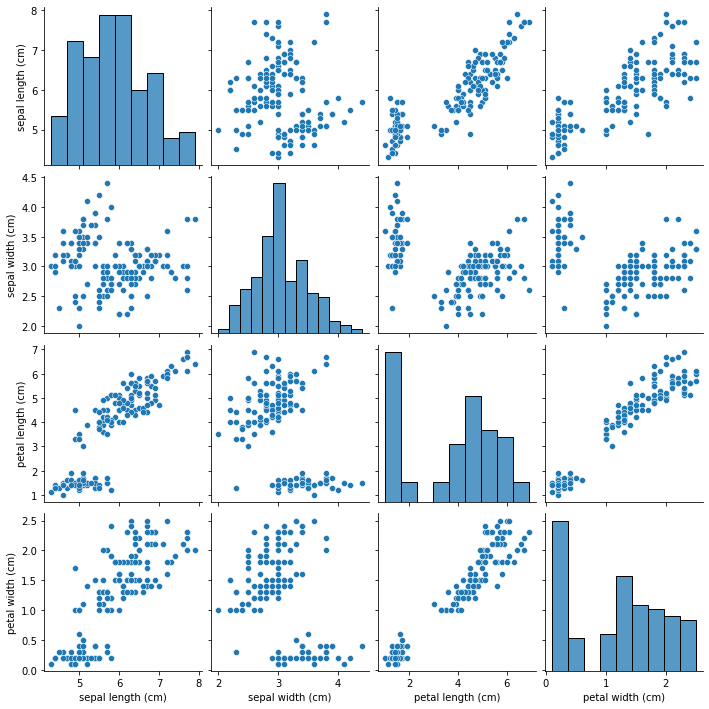

In [33]:
sns.pairplot(X) #visualizing correaltion using pairplot

<AxesSubplot:>

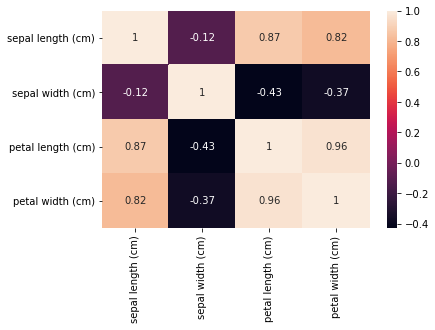

In [34]:
sns.heatmap(X.corr(),annot=True)

From above two graphs we can see one or two attributes are highly correlated. Lets do PCA and check

In [35]:
#Before PCA we need to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.decomposition import PCA

iris_pca = PCA(n_components=3)
X_pca = iris_pca.fit_transform(X_scaled)

In [37]:
X_pca #reduced the dimension from 4 to 3

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557],
       [-2.1663101 ,  1.04369065, -0.2686811 ],
       [-2.32613087,  0.13307834,  0.09375924],
       [-2.2184509 , -0.72867617, -0.23091124],
       [-2.6331007 , -0.96150673,  0.18079608],
       [-2.1987406 ,  1.86005711, -0.472901  ],
       [-2.26221453,  2.68628449,  0.03052661],
       [-2.2075877 ,  1.48360936, -0.00534409],
       [-2.19034951,  0.48883832, -0.04421532],
       [-1.898572  ,  1.40501879, -0.37434327],
       [-2.34336905,  1.12784938,  0.13263047],
       [-1.914323  ,  0.40885571, -0.421

In [38]:
#Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=8)

In [39]:
lo_model = LogisticRegression()
lo_model.fit(X_train,y_train)
y_pred = lo_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')


In [41]:
lo_li = {'Model':"LogisticRegression","Accuracy":[accuracy],"Precision":[precision],"Recall":[recall],"f1 score":[f1]}
lo_ev_df = pd.DataFrame(lo_li)

In [42]:
lo_ev_df #The evaluation metrics for the logistic regression

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticRegression,0.9,0.9,0.902357,0.899749


In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred,labels=[0,1,2])
print(cm)

[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]


<AxesSubplot:>

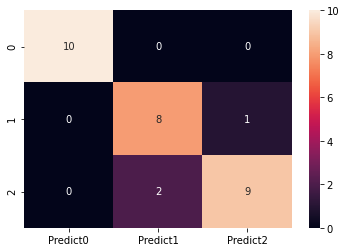

In [44]:
sns.heatmap(cm,annot=True,xticklabels=['Predict0','Predict1','Predict2']) #using heatmap to visualize confusion metrics

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



For this model 90% of predictions were correct, such an accuracy level is needed. Same is the case for precision and recall. F1 score is the mean of precision and recall which is 89%.<b> (Precision and Recall | Essential Metrics for Machine Learning (2023 Update) (2023):The Role of the F1-Score) </b> Overall the logistic regression model is performing well.


<b>4. Apply L1 or L2 regulariser on the logistic regression model developed using the same train and test data used in Q3 and calculate performance of the new model. Compare performance of this model with the performance reported in Q3. Explain the outcome.</b>

In [46]:
lo_model2 = LogisticRegression(penalty='l2')
lo_model2.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred2 = lo_model2.predict(X_test)


In [48]:
accuracy2 = accuracy_score(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2,average='macro')
recall2 = recall_score(y_test,y_pred2,average='macro')
f12 = f1_score(y_test,y_pred2,average='macro')


In [49]:
print(f12)


0.899749373433584


In [50]:
lo_li2 = {'Model':"LogisticRegression L2","Accuracy":accuracy2,"Precision":precision2,"Recall":recall2,"f1 score":f12}
lo_ev_df = lo_ev_df.append(lo_li2,ignore_index=True)

In [51]:
lo_ev_df

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticRegression,0.9,0.9,0.902357,0.899749
1,LogisticRegression L2,0.9,0.9,0.902357,0.899749


Both the model is giving same performance values. L2 regularisation was supposed to give close to the original value but it gave exactly the same result. We chose L2 because of its beneift over corelated data as we saw before some of our attributes are highly correlated <b>(Difference between L1 and L2 regularization? (2023):Difference between L1 & L2 regularization)</b>. The performance after L2 remains same because maybe the PCA has reduced the colinearity thus inturn affect the regularisation.<br>

If the Logistic Regression with L2 regularizer gave better or similar performance metrics with non regularizer model we could have said that L2 regularizer successfully reduced the impact of irrelevant features and improved the model's performance. If it performed worse than normal Logistic Regression model it might indicate that L2 regularization overly penalized important features, leading to underfitting.
But here for us the performance remain same even after regularization this could be because the original model was not overfitting, or that the dataset is not complex enough to benefit from regularization. The PCA made the model less complex.

<b>5. Load "digits" datasets from SKlearn and print the dimension of the dataset. Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s.</b>

In [52]:
%reset -f

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
%matplotlib inline
import seaborn as sns

In [54]:
X,y = load_digits(return_X_y=True,as_frame=True)


In [55]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [56]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [57]:
#The dimension of the dataset
X.shape

(1797, 64)

It has 1797 rows and 64 columns excluding the target variable.

In [58]:
#We can see that the attributes represent the score of each data based on its pixel. And the target label is which digit it is.

y.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [60]:
X.isna().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

No null values 

In [61]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_3,1797.0,12.089037,4.374694,0.0,11.0,13.0,16.0,16.0
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0


In [62]:
#let apply PCA over the data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [63]:
X_pca

array([[ -1.25946467,  21.27488213,  -9.46305244],
       [  7.95761555, -20.76870223,   4.43951203],
       [  6.99191867,  -9.95598289,   2.95855275],
       ...,
       [ 10.801282  ,  -6.96024976,   5.59955139],
       [ -4.87209898,  12.42395288, -10.1708652 ],
       [ -0.34439504,   6.36555374,  10.77370059]])

In [64]:
X_pca.shape   

(1797, 3)

Above we can see the dimension of the modifed dataset, it has reduced from 64 to 3 after pca.

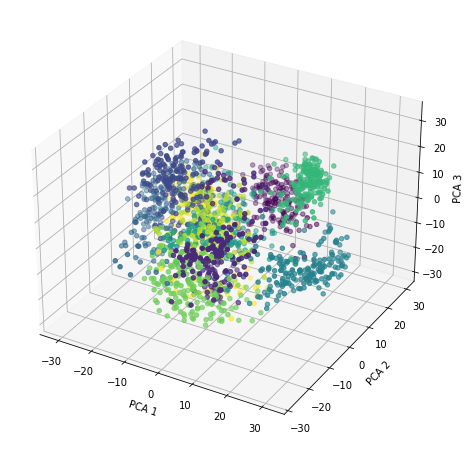

In [65]:
#Now lets visualize the data
#Plotting the scatterplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],c=y)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

<b>6. Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.</b>

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=8)

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [68]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

In [70]:
svm_li = {'Model':"SVM rbf kernel","Accuracy":[accuracy],"Precision":[precision],"Recall":[recall],"f1 score":[f1]}
svm_df = pd.DataFrame(svm_li)

In [71]:
svm_df  #The dataframe showing performance metrics of SVM

,Model,Accuracy,Precision,Recall,f1 score
0,SVM rbf kernel,0.741667,0.768795,0.741667,0.725013


In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.79      0.59      0.68        37
           2       0.87      0.81      0.84        32
           3       0.81      0.76      0.78        38
           4       1.00      0.92      0.96        26
           5       0.67      0.16      0.26        49
           6       0.95      1.00      0.97        37
           7       0.73      0.93      0.81        40
           8       0.42      0.73      0.53        33
           9       0.55      0.82      0.66        34

    accuracy                           0.74       360
   macro avg       0.78      0.77      0.75       360
weighted avg       0.77      0.74      0.73       360



We can see that the model is giving good accuracy but still it is not the best.

In [73]:
#Now lets print the model hyperparameters used

print("The model hyperparameters are:")
print("\nKernel:",model.kernel)
print("Gamma:",model.gamma)
print("C:",model.C)
print("Degree:",model.degree)

The model hyperparameters are:

Kernel: rbf
Gamma: scale
C: 1.0
Degree: 3


<b>7. Load "diabetes" datasets from SKlearn and print the dimension of the dataset. Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique.</b>

In [74]:
%reset -f

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_diabetes

In [76]:
X,y =load_diabetes(return_X_y=True,as_frame=True)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [77]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [78]:
#Dimensions of the dataset
X.shape

(442, 10)

Dimension of the data is 10 excluding the target variable.

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [80]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


There are no null value present so lets do the dimensionality reduction

In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,random_state=8)
X_out = tsne.fit_transform(X)

C:\Users\kisho\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kisho\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [82]:
X_out

array([[  1.490423 , -39.585182 , -68.59343  ],
       [ 81.92445  ,  67.18463  ,  -5.5738163],
       [ -7.443219 , -30.690851 , -83.60418  ],
       ...,
       [-20.35088  , -17.54651  , -61.89001  ],
       [ -3.2041287,  37.311275 ,  75.48804  ],
       [115.09242  ,  15.791394 , -29.70838  ]], dtype=float32)

In [83]:
X_out.shape

(442, 3)

The dimension of the dataset reduced from 10 to 3 after TSNE

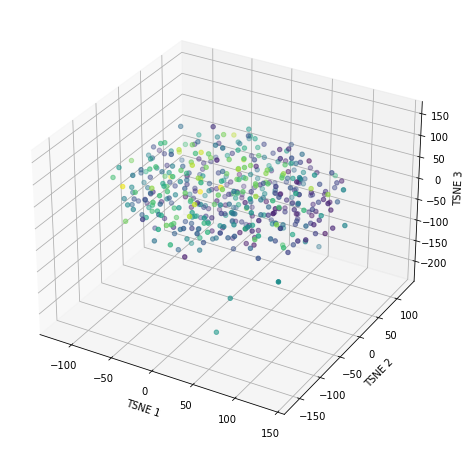

In [84]:
#Now lets visualize the data.

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')
ax1.scatter(X_out[:,0], X_out[:,1], X_out[:,2], c=y)
ax1.set_xlabel('TSNE 1')
ax1.set_ylabel('TSNE 2')
ax1.set_zlabel('TSNE 3')
plt.show()

We got a good visualization of the higher dimensional data into a 3d format 

<b>8. Create a model for detecting diabetes using SVM with a poly kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.</b>

We are told to detect diabetes, the dataset we are having is of continuous variable and the target variable is also a continuous variable, so we cant do classification with the raw data that is provided. We need to convert the continuous target variable into a binary format (1 as having diabetes and 0 as not having diabetes). This can be done by setting a threshold value and if it fall within the range we convert it accordingly.<br>

The target value is a quantitative measure of disease progression one year after baseline<b>(Diabetes dataset(nd):7.1. Toy datasets)</b>.

In [85]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

From above we can see the target value changes from 25 to 346 and the mean is 152. So we are taking the threshold as 152 for now. And converting it into binary

In [86]:
y_cat = np.where(y>=152,1,0) #If the value is above or equal to 152 it is changed to 1 otherwise 0 indicating diabetes or not.
#We are using shorthand operator

In [87]:
y_cat

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

Now lets create SVC model for detecting diabetes.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_out,y_cat,test_size=0.2,random_state=8)

In [90]:
model = SVC(kernel='poly')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

In [92]:
svc_li = {'Model':["SVM poly kernel"],"Accuracy":[accuracy],"Precision":[precision],"Recall":[recall],"F1 score":[f1]
       }
svc_poly = pd.DataFrame(svc_li)
svc_poly

,Model,Accuracy,Precision,Recall,F1 score
0,SVM poly kernel,0.662921,0.68021,0.662921,0.640143


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        49
           1       0.73      0.40      0.52        40

    accuracy                           0.66        89
   macro avg       0.68      0.64      0.63        89
weighted avg       0.68      0.66      0.64        89



In [94]:
#Now lets print the model hyperparameters used

print("The model hyperparameters are:")
print("\nKernel:",model.kernel)
print("Gamma:",model.gamma)
print("C:",model.C)
print("Degree:",model.degree)

The model hyperparameters are:

Kernel: poly
Gamma: scale
C: 1.0
Degree: 3


Our SVC model is only giving 66% accuracy which is not good enough. More data preprocessing could increase the accuracy.

<b>9. Based on the model hyper-parameters used in Q6 and Q8, share your understanding of hyper-parameters tuning in ML model development.</b>

Both the problems used same default hyperparameters except Kernel, Q6 used 'rbf' (Radial Basis Function) and Q8 used 'poly' kernel. The kernel value depends on the type of problem. 'rbf' can capture non-linear relationship whereas 'poly' method can capture polynomial relations.

Both the model gave poor performance,the rbf kernel performed better than poly kernel this maybe happened due to the use of default parameters. We can overcome it by determining optimal parameters through hyper parameter tuning. These tuning tries different combinations of parameters and finally gives the best value for the model. We can use methods such as GridSearch, RandomSearch to optimize this.

By hyperparameter tuning machine learning models can achieve better generalization,improve prediction accuracy, and be more robust to unseen data, making it a critical aspect of the model development process.

### <u>List of References</u>


Analytics Vidya (7 July 2023)Precision and Recall | Essential Metrics for Machine Learning (2023 Update), accessed 28 July 2023<br>
        https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/<br><br>
        
Scikit-Learn (nd) 7.1. Toy Datasets, accessed 29 July 2023<br>
        https://scikit-learn.org/stable/datasets/toy_dataset.html<br><br>

Towards Data Science (5 October 2018)Linear Regression on Boston Housing Dataset, accessed 28 July 2023.<br>
        https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155<br><br>

tutorialspoint (27 February 2023) Difference between L1 & L2 regularization, accessed 29 July 2023 <br>
        https://www.tutorialspoint.com/difference-between-l1-and-l2-regularization<br><br>